<a href="https://colab.research.google.com/github/sonuuno2020/CNN/blob/main/05_transfer_learning_in_tensorflow_(_part_2_fine_tunning_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Treansfer Learning in Tensorflow - Fine Tunning (part 2)**

**What is special to fine tunning 🌟**

In first transfer learning technique , **`feature extraction`** we have learned to utilize a pre-train model on our **custom data without making any change in model** just add output layers according to our problem

---
Here we will going to learn how we can **make changes in pretrain-model , It could be in some layers or all layers of model** and here we require **more custom data than feature extraction technique**


In [ ]:
# check we are using GPU
!nvidia-smi

Fri Jan 28 13:31:24 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## **Get Helper functions**

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-01-28 13:31:32--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-01-28 13:31:32 (50.0 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import create_tensorboard_callback,unzip_data,walk_through_dir

## **Get our Data**

Let's first go with `tf.keras.application` pretrained model:

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data("10_food_classes_10_percent.zip")

--2022-01-28 13:31:40--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.133.128, 74.125.140.128, 108.177.15.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.133.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   114MB/s    in 1.4s    

2022-01-28 13:31:42 (114 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ch

In [ ]:
train_dir="10_food_classes_10_percent/train"
test_dir="10_food_classes_10_percent/test"

In [ ]:
import tensorflow as tf

train_data_10_percent=tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                            image_size=(224,224),
                                                            label_mode='categorical',
                                                            batch_size=32)

test_data=tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                image_size=(224,224),
                                                label_mode='categorical',
                                                batch_size=32)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
train_data_10_percent

<BatchDataset shapes: ((None, 224, 224, 3), (None, 10)), types: (tf.float32, tf.float32)>

In [ ]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
train_data_10_percent.take(5)

<TakeDataset shapes: ((None, 224, 224, 3), (None, 10)), types: (tf.float32, tf.float32)>

In [ ]:
for images,labels in train_data_10_percent.take(1):
  print(images,labels)

tf.Tensor(
[[[[2.27142868e+02 2.20142868e+02 2.12142868e+02]
   [2.28576538e+02 2.21576538e+02 2.13576538e+02]
   [2.29994904e+02 2.22780609e+02 2.17423462e+02]
   ...
   [2.14263916e-01 2.14263916e-01 2.21426392e+00]
   [0.00000000e+00 0.00000000e+00 2.00000000e+00]
   [0.00000000e+00 0.00000000e+00 2.00000000e+00]]

  [[1.88198959e+02 1.83198959e+02 1.77198959e+02]
   [2.02010193e+02 1.97010193e+02 1.91010193e+02]
   [2.12265305e+02 2.07265305e+02 2.01693878e+02]
   ...
   [2.14263916e-01 2.14263916e-01 2.21426392e+00]
   [0.00000000e+00 0.00000000e+00 2.00000000e+00]
   [0.00000000e+00 0.00000000e+00 2.00000000e+00]]

  [[5.03163223e+01 4.55306091e+01 4.17448921e+01]
   [7.61479568e+01 7.13622437e+01 6.75765305e+01]
   [9.69591751e+01 9.23877487e+01 8.81734619e+01]
   ...
   [2.14263916e-01 2.14263916e-01 2.21426392e+00]
   [0.00000000e+00 0.00000000e+00 2.00000000e+00]
   [0.00000000e+00 0.00000000e+00 2.00000000e+00]]

  ...

  [[1.72785721e+02 1.59785721e+02 1.42632675e+02]
   [1

In [ ]:
test_data.take(1)

<TakeDataset shapes: ((None, 224, 224, 3), (None, 10)), types: (tf.float32, tf.float32)>

In [ ]:
train_data_10_percent.take(10)

<TakeDataset shapes: ((None, 224, 224, 3), (None, 10)), types: (tf.float32, tf.float32)>

## **Create a model using Functional way feature extraction**

In [ ]:
base_model=tf.keras.applications.efficientnet.EfficientNetB0(include_top=False)

base_model.trainable=False

# input layer
inputs=tf.keras.layers.Input(shape=(224,224,3),name="input_layer")

# for rescaling (not for efficientnet used in Resnet like model)
# x=tf.keras.experimental.preprocessing.rescaling(1./255)(inputs)

x=base_model(inputs)

print(f"shape of model : {x.shape}")

# Average pooling the ouputs of base model 
# ( aggregate all the most important features and reducing computation)

x=tf.keras.layers.GlobalAveragePooling2D(name="Average_pooling_layer")(x)

print(f"shape after global average pooling {x.shape}")

# output layer

outputs=tf.keras.layers.Dense(10,activation='softmax',name="output_layer")(x)

16719872/16705208 [==============================] - 0s 0us/step
shape of model : (None, 7, 7, 1280)
shape after global average pooling (None, 1280)


In [ ]:
# combine input and output layer in a single model

model_0=tf.keras.Model(inputs,outputs)

In [ ]:
# compile model
model_0.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer='adam',
                metrics=['accuracy'])

In [ ]:
from helper_functions import create_tensorboard_callback

tf.random.set_seed(42)

history_0=model_0.fit(train_data_10_percent,
                      epochs=5,
                      validation_data=test_data,
                      callbacks=[create_tensorboard_callback("records","model_0")])

Saving TensorBoard log files to: records/model_0/20220128-133315
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


24/24 [==============================] - 32s 720ms/step - loss: 1.9123 - accuracy: 0.3947 - val_loss: 1.3472 - val_accuracy: 0.7168
Epoch 2/5
24/24 [==============================] - 14s 568ms/step - loss: 1.1494 - accuracy: 0.7493 - val_loss: 0.9231 - val_accuracy: 0.8008
Epoch 3/5
24/24 [==============================] - 14s 571ms/step - loss: 0.8422 - accuracy: 0.8107 - val_loss: 0.7507 - val_accuracy: 0.8256
Epoch 4/5
24/24 [==============================] - 14s 570ms/step - loss: 0.6863 - accuracy: 0.8427 - val_loss: 0.6663 - val_accuracy: 0.8324
Epoch 5/5
24/24 [==============================] - 14s 575ms/step - loss: 0.5921 - accuracy: 0.8693 - val_loss: 0.6089 - val_accuracy: 0.8452


In [ ]:
model_0.evaluate(test_data)

79/79 [==============================] - 11s 128ms/step - loss: 0.6089 - accuracy: 0.8452


[0.6088675260543823, 0.8452000021934509]

In [ ]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 Average_pooling_layer (Glob  (None, 1280)             0         
 alAveragePooling2D)                                             
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


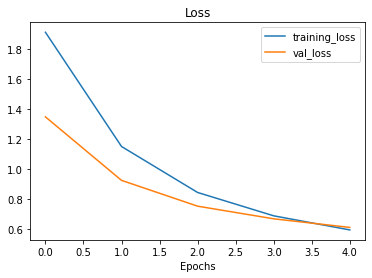

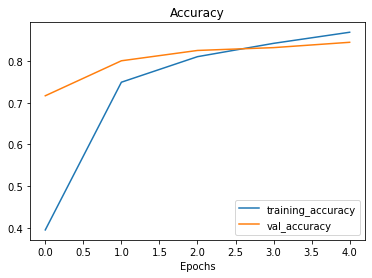

In [ ]:
from helper_functions import plot_loss_curves

plot_loss_curves(history_0)

## **Getting a feature vector from pre-trained model**

Let 's Demonstrate the **GlobalAveragePooling2D** layer...
What it does ❓

---
It takes a input of shape (None,7,7,1280) and give a vector of (None,1280) as output.

Let's use a similar shape tensor (1,3,3,4) and pass to GlobalAveragePooling2D....


---

So We get to know that It **condense** the information to **lower dimension of feature vector**


In [ ]:
input_shape=(1,3,3,4)

# create a random tensor
tf.random.set_seed(42)

random_tensor=tf.random.normal(input_shape)
random_tensor

<tf.Tensor: shape=(1, 3, 3, 4), dtype=float32, numpy=
array([[[[ 0.3274685 , -0.8426258 ,  0.3194337 , -1.4075519 ],
         [-2.3880599 , -1.0392479 , -0.5573232 ,  0.539707  ],
         [ 1.6994323 ,  0.28893656, -1.5066116 , -0.2645474 ]],

        [[-0.59722406, -1.9171132 , -0.62044144,  0.8504023 ],
         [-0.40604794, -3.0258412 ,  0.9058464 ,  0.29855987],
         [-0.22561555, -0.7616443 , -1.8917141 , -0.93847126]],

        [[ 0.77852213, -0.47338897,  0.97772694,  0.24694404],
         [ 0.20573747, -0.5256233 ,  0.32410017,  0.02545409],
         [-0.10638497, -0.6369475 ,  1.1603122 ,  0.2507359 ]]]],
      dtype=float32)>

In [ ]:
# pass the random tensor to GlobalAveragePolling2D
global_average_pool_tensor=tf.keras.layers.GlobalAveragePooling2D()(random_tensor)
global_average_pool_tensor

<tf.Tensor: shape=(1, 4), dtype=float32, numpy=
array([[-0.0791302 , -0.9926107 , -0.09874121, -0.04430747]],
      dtype=float32)>

In [ ]:
random_tensor.shape,global_average_pool_tensor.shape

(TensorShape([1, 3, 3, 4]), TensorShape([1, 4]))

In [ ]:
# Let's replicate globalAveragePoolin2D layer
tf.reduce_mean(random_tensor,axis=[1,2])

<tf.Tensor: shape=(1, 4), dtype=float32, numpy=
array([[-0.0791302 , -0.9926107 , -0.09874121, -0.04430747]],
      dtype=float32)>

## **Experiments for Transfer Learning**

1. `model_1` 🐾 feature-extraction , using 1% of training data with data augumentation
2. `model_2` 🐾 feature-extraction , using 10% of training data eith data augumentation
3. `model_3` 🐾 fine tuning , using 10% of training data with data augumentation
4. `model_4` 🐾 fine tuning , using 100% of training data with data augumentation

**Note** ⛓ Here in all cases testing data is same for evaluation purpose.

### **Get Data and preprocessing data for model_1**

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data('10_food_classes_10_percent.zip')

--2022-01-28 13:38:03--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.5.128, 74.125.133.128, 74.125.140.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.5.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M   182MB/s    in 0.9s    

2022-01-28 13:38:04 (182 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

unzip_data('10_food_classes_1_percent.zip')

--2022-01-28 13:38:09--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.5.128, 74.125.133.128, 74.125.140.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.5.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M  67.4MB/s    in 1.9s    

2022-01-28 13:38:11 (67.4 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [ ]:
train_dir_10_percent='10_food_classes_10_percent/train'
test_dir_10_percent='10_food_classes_10_percent/test'

In [ ]:
train_dir_1_percent='10_food_classes_1_percent/train'
test_dir_1_percent='10_food_classes_1_percent/test'

In [ ]:
walk_through_dir('10_food_classes_1_percent')

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_wings'

In [ ]:
# get dataloaders
import tensorflow as tf
train_data_1_per=tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                    image_size=(224,224),
                                                                    label_mode='categorical',
                                                                    batch_size=32)
test_data_1_per=tf.keras.preprocessing.image_dataset_from_directory(test_dir_1_percent,
                                                                    image_size=(224,224),
                                                                    label_mode='categorical',
                                                                    batch_size=32
                                                                    )


Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
# get dataloaders
import tensorflow as tf
train_data_10_per=tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                    image_size=(224,224),
                                                                    label_mode='categorical',
                                                                    batch_size=32)
test_data_10_per=tf.keras.preprocessing.image_dataset_from_directory(test_dir_10_percent,
                                                                    image_size=(224,224),
                                                                    label_mode='categorical',
                                                                    batch_size=32
                                                                    )


Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


### **Building Data Augumentation**

To add data augumentation there is a layer in tensorflow
`tf.keras.layers.experimental.preprocessing()`

**Advantages to do data augumentation in model** 🐾
1. Data augumented by `ImageDataGenerator()` is preprocessed on CPU but by this method data augumentation is processed on GPU so It will compute fastly..

2. Data Augumentation is perform during trainig phase so this can be saved with model to use some where else..

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import layers

In [ ]:
# Data Augumented as rotated,flipped,cropped..

Data_augumentaion=tf.keras.Sequential([
  preprocessing.RandomFlip('horizontal'),
  preprocessing.RandomRotation(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2)
],name="data_augumentation")


### **Let's Visualize what happen to our data**

In [ ]:
# let's view for random image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

In [ ]:
target_classes=train_data_1_per.class_names
target_classes

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
def plot_random_image():
  target_class=random.choice(target_classes)
  target_path='10_food_classes_1_percent/train'+"/"+target_class
  random_img=random.choice(os.listdir(target_path))
  image_path=target_path+"/"+random_img

  print(image_path)

  image=plt.imread(image_path)
  plt.imshow(image)
  plt.title("Original:"+target_class)
  plt.axis("off")

  # Augumented image
  augumented_img=Data_augumentaion(tf.expand_dims(image,axis=0))
  plt.figure()
  plt.imshow(tf.squeeze(augumented_img)/255.)
  plt.title("Augumented :"+target_class)
  plt.axis('off')





10_food_classes_1_percent/train/sushi/2932846.jpg


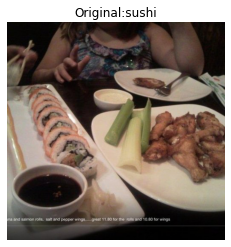

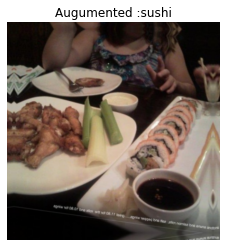

In [ ]:
plot_random_image()

## **Building a model_1 :**
**feature extraction: 1% of data and data augumentation**

In [ ]:
input_shape=(224,224,3)

# base model
base_model=tf.keras.applications.efficientnet.EfficientNetB0(include_top=False)

base_model.trainable=False

# input_layers
input=tf.keras.layers.Input(shape=input_shape,name='input_layer')

x=Data_augumentaion(input)

x=base_model(x,training=False)

print("shape before globalAveragePooling :",x.shape)
x=tf.keras.layers.GlobalAveragePooling2D(name="global_Average_pooling_layer")(x)
print("shape after globalAveragePooling :",x.shape)

output=tf.keras.layers.Dense(10,activation='softmax',name='softmax')(x)

# combine all layer into a model
model_1=tf.keras.Model(input,output)

# compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer='adam',
                metrics=['accuracy'])

# fit the data into model
history_1=model_1.fit(train_data_1_per,
                      epochs=5,
                      validation_data=test_data_1_per,
                      steps_per_epoch=len(train_data_1_per),
                      validation_steps=len(test_data_1_per),
                      callbacks=[create_tensorboard_callback('records','1%_data_augmented')])



shape before globalAveragePooling : (None, None, None, 1280)
shape after globalAveragePooling : (None, 1280)
Saving TensorBoard log files to: records/1%_data_augmented/20220128-134130
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


3/3 [==============================] - 21s 6s/step - loss: 0.7272 - accuracy: 0.1143 - val_loss: 0.6119 - val_accuracy: 0.1220
Epoch 2/5
3/3 [==============================] - 22s 11s/step - loss: 0.5821 - accuracy: 0.1429 - val_loss: 0.5118 - val_accuracy: 0.1400
Epoch 3/5
3/3 [==============================] - 12s 6s/step - loss: 0.4784 - accuracy: 0.2143 - val_loss: 0.4405 - val_accuracy: 0.1680
Epoch 4/5
3/3 [==============================] - 12s 6s/step - loss: 0.4084 - accuracy: 0.2143 - val_loss: 0.3920 - val_accuracy: 0.1984
Epoch 5/5
3/3 [==============================] - 12s 6s/step - loss: 0.3531 - accuracy: 0.3000 - val_loss: 0.3601 - val_accuracy: 0.2368


In [ ]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augumentation (Sequent  (None, None, None, 3)    0         
 ial)                                                            
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_Average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 softmax (Dense)             (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

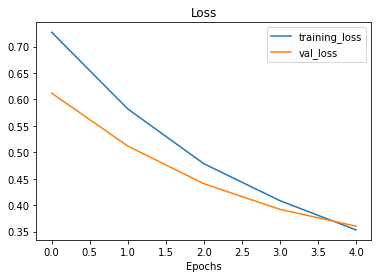

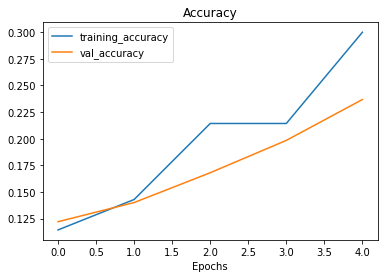

In [ ]:
plot_loss_curves(history_1)

In [ ]:
from helper_functions import plot_loss_curves

## **Building a model_2:**

**feature extraction with 10% of data and data augumentation**

In [ ]:
base_model=tf.keras.applications.efficientnet.EfficientNetB0(include_top=False)

base_model.trainable=False

input=tf.keras.layers.Input(shape=input_shape,name='input_layer')

x=Data_augumentaion(input)

x=base_model(input,training=False)

x=tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)

output=tf.keras.layers.Dense(10,activation='softmax')(x)

model_2=tf.keras.Model(input,output)

model_2.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

history_2=model_2.fit(train_data_10_per,
                      epochs=5,
                      validation_data=test_data_10_per,
                      steps_per_epoch=len(train_data_10_per),
                      validation_steps=int(0.25*len(test_data_10_per)))

Epoch 1/5
24/24 [==============================] - 15s 339ms/step - loss: 0.4170 - accuracy: 0.2760 - val_loss: 0.2788 - val_accuracy: 0.5740
Epoch 2/5
24/24 [==============================] - 7s 269ms/step - loss: 0.2540 - accuracy: 0.6653 - val_loss: 0.2167 - val_accuracy: 0.7845
Epoch 3/5
24/24 [==============================] - 7s 266ms/step - loss: 0.2044 - accuracy: 0.7640 - val_loss: 0.1795 - val_accuracy: 0.8207
Epoch 4/5
24/24 [==============================] - 7s 270ms/step - loss: 0.1749 - accuracy: 0.8093 - val_loss: 0.1616 - val_accuracy: 0.8339
Epoch 5/5
24/24 [==============================] - 7s 275ms/step - loss: 0.1556 - accuracy: 0.8253 - val_loss: 0.1451 - val_accuracy: 0.8586


In [ ]:
model_2.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 dense_3 (Dense)             (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [ ]:
result_model_10_per=model_2.evaluate(test_data_10_per)

79/79 [==============================] - 11s 131ms/step - loss: 0.1516 - accuracy: 0.8280


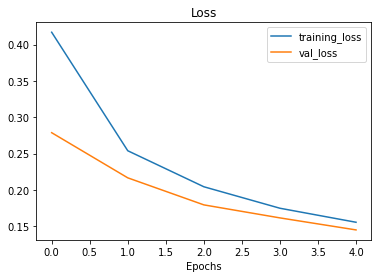

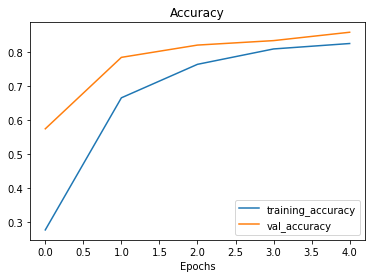

In [ ]:
plot_loss_curves(history_2)

### **Creating a modelCheckPoint callback**

intermidately save our model so it can starts at that point later on..every epoch

In [ ]:
checkpoint_path='10_percent_checkpoints/checkpoint.ckpt'

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                       save_weights_only=True,
                                                       save_freq='epoch',
                                                       verbose=1)


In [ ]:
history_2=model_2.fit(train_data_10_per,
                      epochs=5,
                      validation_data=test_data_10_per,
                      validation_steps=len(test_data_10_per),
                      steps_per_epoch=len(train_data_10_per),
                      callbacks=[checkpoint_callback])

Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 0.1409 - accuracy: 0.8587
Epoch 00001: saving model to 10_percent_checkpoints/checkpoint.ckpt
24/24 [==============================] - 14s 592ms/step - loss: 0.1409 - accuracy: 0.8587 - val_loss: 0.1414 - val_accuracy: 0.8284
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 0.1297 - accuracy: 0.8653
Epoch 00002: saving model to 10_percent_checkpoints/checkpoint.ckpt
24/24 [==============================] - 14s 596ms/step - loss: 0.1297 - accuracy: 0.8653 - val_loss: 0.1340 - val_accuracy: 0.8360
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 0.1201 - accuracy: 0.8800
Epoch 00003: saving model to 10_percent_checkpoints/checkpoint.ckpt
24/24 [==============================] - 14s 592ms/step - loss: 0.1201 - accuracy: 0.8800 - val_loss: 0.1279 - val_accuracy: 0.8424
Epoch 4/5
24/24 [==============================] - ETA: 0s - loss: 0.1123 - accuracy: 0.8920
Epoch 00004: saving model to

In [ ]:
result_model_10_per=model_2.evaluate(test_data_10_per)

79/79 [==============================] - 11s 133ms/step - loss: 0.1188 - accuracy: 0.8464


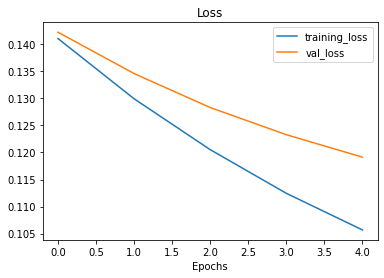

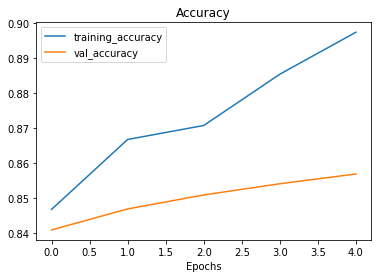

In [ ]:
plot_loss_curves(history_2)

### **Loading in checkpoints**

In [ ]:
model_2.load_weights(checkpoint_path)

In [ ]:
model_2.evaluate(test_data_10_per)

79/79 [==============================] - 11s 130ms/step - loss: 0.1191 - accuracy: 0.8568


[0.11913607269525528, 0.8568000197410583]

## **Building a model_3 :**


🔑 before **fine tunning** our model should be trained in **feture-extractor** manner to get good results..


**fine tunning of model_2**

here we are going to make changes in model_2 by fine tunning

In [ ]:
model_2.layers

In [ ]:
for i,layer in enumerate(model_2.layers[1].layers):
  print(i,layer.name,layer.trainable)

0 input_4 False
1 rescaling_3 False
2 normalization_3 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

**let's tune last 10 layers of base_model**

In [ ]:
base_model.trainable=True

for layer in base_model.layers[:-10]:
  layer.trainable=False

# recompile it

model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.0001),
                metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


**while fine tunning we require lower learing rate**

In [ ]:
for i,layer in enumerate(model_2.layers[1].layers):
  print(i,layer.name,layer.trainable)

0 input_4 False
1 rescaling_3 False
2 normalization_3 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

**We have unfrozen 10 layers**

In [ ]:
len(model_2.layers[1].trainable_variables)

10

**fitting model_3**

In [ ]:
history_2.epoch

[0, 1, 2, 3, 4]

In [ ]:
fine_tune_epochs=len(history_2.epoch) + 5 # train for more 5 epoch from where left...

In [ ]:
history_3=model_2.fit(train_data_10_per,
                      epochs=fine_tune_epochs,
                      validation_data=test_data_10_per,
                      validation_steps=len(test_data_10_per),
                      steps_per_epoch=len(train_data_10_per),
                      initial_epoch=history_2.epoch[-1],
                      callbacks=[checkpoint_callback])

Epoch 5/10
24/24 [==============================] - ETA: 0s - loss: 0.3483 - accuracy: 0.9080
Epoch 00005: saving model to 10_percent_checkpoints/checkpoint.ckpt
24/24 [==============================] - 22s 660ms/step - loss: 0.3483 - accuracy: 0.9080 - val_loss: 0.4442 - val_accuracy: 0.8524
Epoch 6/10
24/24 [==============================] - ETA: 0s - loss: 0.2466 - accuracy: 0.9347
Epoch 00006: saving model to 10_percent_checkpoints/checkpoint.ckpt
24/24 [==============================] - 14s 593ms/step - loss: 0.2466 - accuracy: 0.9347 - val_loss: 0.4297 - val_accuracy: 0.8524
Epoch 7/10
24/24 [==============================] - ETA: 0s - loss: 0.1852 - accuracy: 0.9667
Epoch 00007: saving model to 10_percent_checkpoints/checkpoint.ckpt
24/24 [==============================] - 14s 589ms/step - loss: 0.1852 - accuracy: 0.9667 - val_loss: 0.4265 - val_accuracy: 0.8468
Epoch 8/10
24/24 [==============================] - ETA: 0s - loss: 0.1462 - accuracy: 0.9653
Epoch 00008: saving mode

In [ ]:
result_for_fine_tunning=model_2.evaluate(test_data)

79/79 [==============================] - 11s 130ms/step - loss: 0.4401 - accuracy: 0.8480


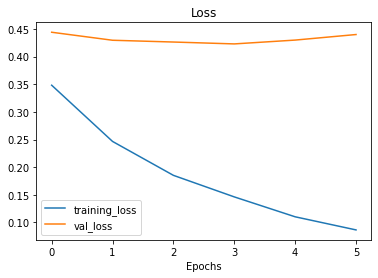

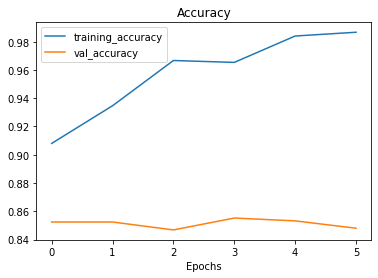

In [ ]:
plot_loss_curves(history_3)

⏰ we get loss curve for first 5 epochs not after it so let make a function for it...

In [ ]:
# let's make a fuction for comparing history

def compare_history(new_history,old_history,initial_epoch):

  # get old history object attributs
  acc=old_history.history['accuracy']
  loss=old_history.history['loss']

  val_loss=old_history.history['val_loss']
  val_acc=old_history.history['val_accuracy']

  # now get new history object and combine with older one

  total_acc = acc + new_history.history['accuracy']
  total_loss = loss + new_history.history['loss'] 

  total_val_loss = val_loss + new_history.history['val_loss']
  total_val_acc = val_acc + new_history.history['val_accuracy']

  epochs=tf.range(len(total_acc))


  plt.figure(figsize=(8,8))
  plt.subplot(2,1,1)
  plt.plot(total_acc,label='total_accuracy')
  plt.plot(total_val_acc,label='total_val_accuracy')
  plt.plot([initial_epoch-1,initial_epoch-1],plt.ylim(),label='start tunning')
  plt.title("Accuracy")

  plt.subplot(2,1,2)
  plt.plot(total_loss,label='total_loss')
  plt.plot(total_val_loss,label='total_validation_loss')
  plt.plot([initial_epoch-1,initial_epoch-1],plt.ylim(),label='start tunning')
  plt.title("Loss")
  plt.legend()

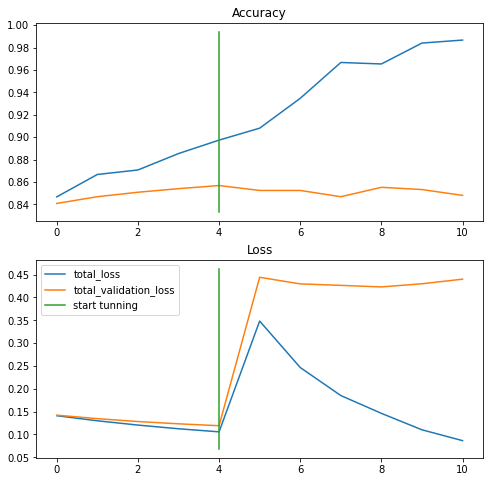

In [ ]:
compare_history(history_3,history_2,5)

## **Fine tunning on all data 100%**

As we know fine tunning perform better on more data...

### **Get Data**

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

unzip_data('10_food_classes_all_data.zip')

--2022-01-28 14:51:58--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.133.128, 74.125.140.128, 108.177.15.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.133.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   109MB/s    in 5.1s    

2022-01-28 14:52:04 (96.4 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
train_dir='10_food_classes_all_data/train'
test_dir='10_food_classes_all_data/test'

In [ ]:
walk_through_dir('10_food_classes_all_data')

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 

In [ ]:
# data loader

train_data_all=tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                image_size=(224,224),
                                                                label_mode='categorical')

test_data_all=tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                  image_size=(224,224),
                                                                  label_mode='categorical')

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


## **Building model_4**

**fine tunning with 100% of data and data is augumented**

To fine tunning, we require a model as feature extracted and train for some epochs so we need our model_2's earlier stage i.e before fine tunning 

We can get it by loading it's checkpoints

In [ ]:
result_model_10_per

[0.11882000416517258, 0.8464000225067139]

In [ ]:
model_2.load_weights(checkpoint_path)

In [ ]:
model_2.evaluate(test_data_10_per)

79/79 [==============================] - 11s 133ms/step - loss: 0.1188 - accuracy: 0.8464


[0.11882004141807556, 0.8464000225067139]

🔑 **What we have did till now....**

1. we make a `model_2` and save it's weights.
2. we load weights of `model_2` and **fine tunned** it and train on 10% of data
, we call it as `model_3`.

till now we have done this much......

---
Now we are going to reload weights of `model_2` and **fine-tune** it on 100% of data , we will call it as `model_4`.


In [ ]:
model_2.layers

In [ ]:
for i,layer in enumerate(model_2.layers[1].layers):
  print(i,layer.name,layer.trainable)

0 input_6 False
1 rescaling_5 False
2 normalization_5 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

**Now unfroze 10 layers from bottom**

In [ ]:
base_model.trainable=True

for layer in base_model.layers[:-10]:
  layer.trainable=False

model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(0.0001),
                metrics=['accuracy'])  

In [ ]:
for i,layer in enumerate(model_2.layers[1].layers):
  print(i,layer.name,layer.trainable)

0 input_6 False
1 rescaling_5 False
2 normalization_5 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

**fitting of `model_4`**

In [ ]:
initial_epoch=len(history_2.epoch)

In [ ]:
fine_tune_epochs = initial_epoch + 5

In [ ]:
history_4=model_2.fit(train_data_all,
                      epochs=fine_tune_epochs,
                      validation_data=test_data,
                      initial_epoch=initial_epoch-1,
                      steps_per_epoch=len(train_data_all),
                      validation_steps=int(0.25*len(test_data_all)),
                      callbacks=[checkpoint_callback]
                      )

Epoch 5/10
235/235 [==============================] - ETA: 0s - loss: 0.5026 - accuracy: 0.8381
Epoch 00005: saving model to 10_percent_checkpoints/checkpoint.ckpt
235/235 [==============================] - 45s 160ms/step - loss: 0.5026 - accuracy: 0.8381 - val_loss: 0.3503 - val_accuracy: 0.8783
Epoch 6/10
235/235 [==============================] - ETA: 0s - loss: 0.3718 - accuracy: 0.8836
Epoch 00006: saving model to 10_percent_checkpoints/checkpoint.ckpt
235/235 [==============================] - 37s 153ms/step - loss: 0.3718 - accuracy: 0.8836 - val_loss: 0.3123 - val_accuracy: 0.8964
Epoch 7/10
235/235 [==============================] - ETA: 0s - loss: 0.3010 - accuracy: 0.9068
Epoch 00007: saving model to 10_percent_checkpoints/checkpoint.ckpt
235/235 [==============================] - 37s 154ms/step - loss: 0.3010 - accuracy: 0.9068 - val_loss: 0.3037 - val_accuracy: 0.9013
Epoch 8/10
235/235 [==============================] - ETA: 0s - loss: 0.2475 - accuracy: 0.9281
Epoch 0000

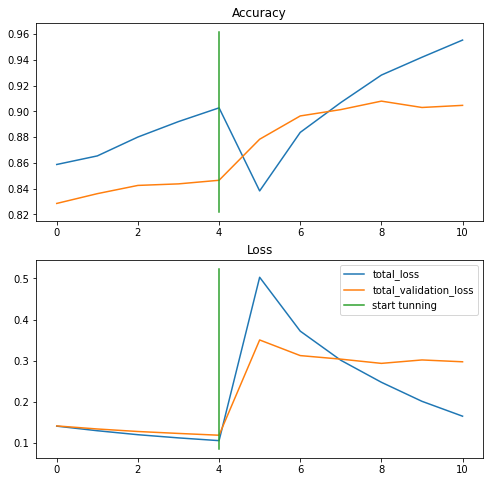

In [ ]:
compare_history(history_4,history_2,5)

In [ ]:
model_2.evaluate(test_data_all)

79/79 [==============================] - 11s 133ms/step - loss: 0.2700 - accuracy: 0.9120


[0.27003270387649536, 0.9120000004768372]